### Libraries

In [ ]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
import numpy as np

import matplotlib.pyplot as plt

import tensorflow.keras as keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

### Data preparation

#### Import data

In [ ]:
def load_data():
    
    dataset = fetch_openml('mnist_784', version=1, data_home=None)
    raw_X = dataset['data']
    raw_Y = dataset['target']
    return raw_X, raw_Y

raw_X, raw_Y = load_data()

In [ ]:
def clean_data(raw_X, raw_Y):
 
    array_X= np.array(raw_X)
    print('Data type of X:', array_X.dtype)
    print('Shape of X:', array_X.shape)
    print('Range of X:', array_X.min(), 'to', array_X.max())
    print('Scale...')
    cleaned_X= array_X/255.0
    print('New range of X:', cleaned_X.min(), 'to', cleaned_X.max())
    
    array_Y= np.array(raw_Y)
    print('\nData type of Y:', array_Y.dtype)
    print('Shape of Y:', array_Y.shape)
    print('Range of Y:', array_Y.min(), 'to', array_Y.max())
    print('Targets:', np.unique(array_Y))
    print('Transform...')
    cleaned_Y = keras.utils.to_categorical(array_Y, num_classes=10)
    print('New shape of Y:', cleaned_Y.shape)
    print('New data type of Y:', cleaned_Y.dtype)
    print('New range of Y:', cleaned_Y.min(), 'to', cleaned_Y.max())
  
    return cleaned_X, cleaned_Y

cleaned_X, cleaned_Y = clean_data(raw_X, raw_Y)

Data type of X: float64
Shape of X: (70000, 784)
Range of X: 0.0 to 255.0
Scale...
New range of X: 0.0 to 1.0
Could use keras.utils.normalize though saw no difference in output.

Data type of Y: object
Shape of Y: (70000,)
Range of Y: 0 to 9
Targets: ['0' '1' '2' '3' '4' '5' '6' '7' '8' '9']
Transform...
New shape of Y: (70000, 10)
New data type of Y: float32
New range of Y: 0.0 to 1.0


In [ ]:
def split_data(cleaned_X, cleaned_Y):
    
    X_train, X_test, Y_train, Y_test = \
    train_test_split(cleaned_X, cleaned_Y, test_size=0.3)

    X_train, X_val, Y_train, Y_val = \
    train_test_split(X_train, Y_train, test_size=0.2/0.7) 

    print('Validate splits...',
          '\nTrain size, X:',round(X_train.shape[0]/cleaned_X.shape[0],1),
          'Val size, X:',round(X_val.shape[0]/cleaned_X.shape[0],1), 
          'Test size, X:',round(X_test.shape[0]/cleaned_X.shape[0],1),
          '\nTrain size, Y:',round(Y_train.shape[0]/cleaned_Y.shape[0],1),
          'Val size, Y:',round(Y_val.shape[0]/cleaned_Y.shape[0],1), 
          'Test size, Y:',round(Y_test.shape[0]/cleaned_Y.shape[0],1),
          )
    
    return X_val, X_test, X_train, Y_val, Y_test, Y_train

X_val, X_test, X_train, Y_val, Y_test, Y_train = \
split_data(cleaned_X, cleaned_Y)

Validate splits... 
Train size, X: 0.5 Val size, X: 0.2 Test size, X: 0.3 
Train size, Y: 0.5 Val size, Y: 0.2 Test size, Y: 0.3


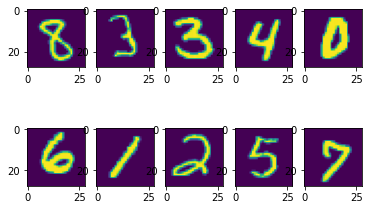

In [ ]:
def viz_data(X_train):
    
    X_train_sample = X_train[:10,]
    f, axarr = plt.subplots(2,5)
    for i in range(0,5):
        axarr[0,i].imshow(X_train_sample[i].reshape([28, 28]))
        axarr[0,i].grid(False)
    for i in range(5,10):
        axarr[1,i-5].imshow(X_train_sample[i].reshape([28, 28]))
        axarr[1,i-5].grid(False)
    plt.show()
    
viz_data(X_train)

### Model

In [ ]:
def build_model():
   
    model = Sequential(
        [ 
         keras.layers.Dense(128, activation='relu', input_dim=784),
         keras.layers.Dropout(0.2),
         keras.layers.Dense(64, activation='relu'),
         keras.layers.Dropout(0.2),
         keras.layers.Dense(10, activation='softmax')
         ])
    print('\nModel summary...')
    model.summary()
    return model

model = build_model()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 128)               100480    
_________________________________________________________________
dropout_4 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 64)                8256      
_________________________________________________________________
dropout_5 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_8 (Dense)              (None, 10)                650       
Total params: 109,386
Trainable params: 109,386
Non-trainable params: 0
_________________________________________________________________


In [ ]:
def compile_model(model):

    model.compile(optimizer='adam', 
                  loss='categorical_crossentropy', 
                  metrics=['accuracy'])
            
    return model

def train_model(model, X_train, Y_train, X_val, Y_val):
  
    print('\nFit and validate...\n')
    history = model.fit(X_train, Y_train, epochs=12,
                        batch_size=128, verbose =1,
                        validation_data=(X_val,Y_val) 
                        )
    
    return model, history

model = compile_model(model)
model, history = train_model(model, X_train, Y_train, X_val, Y_val)


Categorical cross entropy is used for the loss function because we
are using multi-class classification. This requires softmax and the
same number of nodes as classes for the output layer (which was decided
for this model in the previous step). The adam optimizer, a stochastic
gradient descent method, was selected because it uses little memory, it
works well with large datasets, it is computationally efficient, and it is
commonly used with this loss function. These benefits are stated in the 
keras documentation.

Fit and validate...

Epoch 1/12
274/274 [==============================] - 2s 6ms/step - loss: 0.0657 - accuracy: 0.9786 - val_loss: 0.0864 - val_accuracy: 0.9759
Epoch 2/12
274/274 [==============================] - 2s 5ms/step - loss: 0.0548 - accuracy: 0.9820 - val_loss: 0.0913 - val_accuracy: 0.9762
Epoch 3/12
274/274 [==============================] - 1s 5ms/step - loss: 0.0494 - accuracy: 0.9843 - val_loss: 0.0898 - val_accuracy: 0.9749
Epoch 4/12
274/274 [============

Testing...

657/657 [==============================] - 1s 1ms/step - loss: 0.0862 - accuracy: 0.9738

Evaluate will show us the loss and accuracy results on test data
while predict will predict the output using the trained model.

Show predictions that do not match the labels...
Index numbers of wrong predictions within 1st 100 rows: [7, 62, 64, 70, 85] 

Notice how label is wrong or number is unclear.
Prediction: 1
Actual: 8


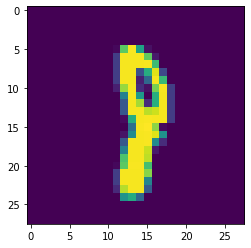

Prediction: 3
Actual: 9


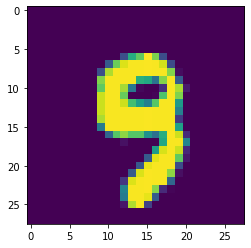

In [ ]:
def eval_model(model, X_test, Y_test):

    #evaluate the model
    print('\nTest...\n')
    test_loss, test_accuracy = model.evaluate(X_test, Y_test, verbose=1)
    
    print('\nShow predictions that do not match the labels...')
    predictions = model.predict(X_test)
    
    incorrect_index = []
    for i in range(100):
       pred = np.argmax(predictions[i])
       actual = np.argmax(Y_test[i])
       if pred != actual:
         incorrect_index.append(i)
    
    print('Index numbers of wrong predictions within 1st 100 rows:', 
          incorrect_index,'\n')
    print('Notice how label is wrong or number is unclear.')
    for p in range (2):
        n = incorrect_index[p]
        print('Prediction:', np.argmax(predictions[n]))
        print('Actual:', np.argmax(Y_test[n]))
        plt.imshow(X_test[n].reshape([28, 28]))
        plt.show()
    
    return test_loss, test_accuracy

test_loss, test_accuracy = eval_model(model, X_test, Y_test)